# ODE using forward Euler

Conside the ODE
$$
y' = -y + 2 \exp(-t) \cos(2t)
$$
with initial condition
$$
y(0) = 0
$$
The exact solution is
$$
y(t) = \exp(-t) \sin(2t)
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

Right hand side function

In [2]:
def f(t,y):
    return -y + 2.0*np.exp(-t)*np.cos(2.0*t)

Exact solution

In [3]:
def yexact(t):
    return np.exp(-t)*np.sin(2.0*t)

This implements Euler method
$$
y_n = y_{n-1} + h f(t_{n-1},y_{n-1})
$$

In [4]:
def euler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t, y

## Solve for a given h

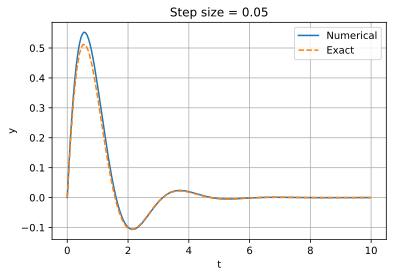

In [5]:
t0,y0 = 0.0,0.0
T  = 10.0
h  = 1.0/20.0
t,y = euler(t0,T,y0,h)
te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.title('Step size = ' + str(h));

## Solve for several h

Study the effect of decreasing step size. The error is plotted in log scale.

5.000000e-02 4.107182e-02 1.035228e+00
2.500000e-02 2.026883e-02 1.018886e+00
1.250000e-02 1.007087e-02 1.009075e+00
6.250000e-03 5.019323e-03 1.004623e+00


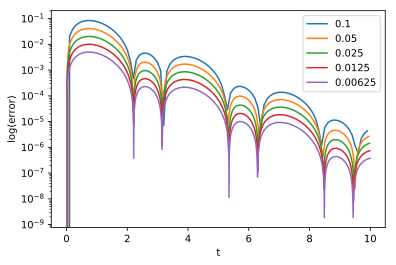

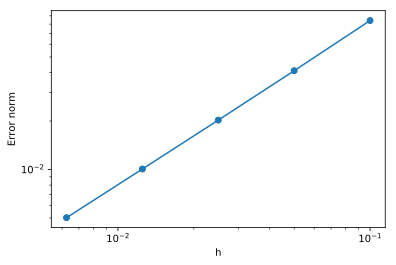

In [6]:
hh = 0.1/2.0**np.arange(5)
err= np.zeros(len(hh))
for (i,h) in enumerate(hh):
    t,y = euler(t0,T,y0,h)
    ye = yexact(t)
    err[i] = np.abs(y-ye).max()
    plt.semilogy(t,np.abs(y-ye))
    
plt.legend(hh)
plt.xlabel('t')
plt.ylabel('log(error)')

for i in range(1,len(hh)):
    print('%e %e %e'%(hh[i],err[i],np.log(err[i-1]/err[i])/np.log(2.0)))

# plot error vs h
plt.figure()
plt.loglog(hh,err,'o-')
plt.xlabel('h')
plt.ylabel('Error norm');